In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('KAG_conversion_data.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
df.shape

(1143, 11)

<br>

# Data Cleaning 

<br>
Looking for any missing values first.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

In [6]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

<br>

There are no null values. Let's procceed with checking if there are any error in the categorical values. We only have age and gender as categoical values. 








In [7]:
df.age.value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

In [8]:
df.gender.value_counts()

M    592
F    551
Name: gender, dtype: int64

In [9]:
df['gender'].replace(
    {
      'M': 'Male',
      'F': 'Female',
    }, 
    inplace=True
)

<br>


Let's double check the values in gender if they're successfully replaced:

In [10]:
df.gender.value_counts()

Male      592
Female    551
Name: gender, dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ad_id,1143.0,987261.130359,193992.814738,708746.0,777632.50,1121185.00,1121804.500,1.314415e+06
xyz_campaign_id,1143.0,1067.382327,121.629393,916.0,936.00,1178.00,1178.000,1.178000e+03
fb_campaign_id,1143.0,133783.989501,20500.308622,103916.0,115716.00,144549.00,144657.500,1.799820e+05
interest,1143.0,32.766404,26.952131,2.0,16.00,25.00,31.000,1.140000e+02
Impressions,1143.0,186732.132983,312762.183208,87.0,6503.50,51509.00,221769.000,3.052003e+06
Clicks,1143.0,33.390201,56.892438,0.0,1.00,8.00,37.500,4.210000e+02
Spent,1143.0,51.360656,86.908418,0.0,1.48,12.37,60.025,6.399500e+02
Total_Conversion,1143.0,2.855643,4.483593,0.0,1.00,1.00,3.000,6.000000e+01
Approved_Conversion,1143.0,0.944007,1.737708,0.0,0.00,1.00,1.000,2.100000e+01


<br>

Take a look at 'xyz_campaign_id' as this is the assoiated id for each as campaign used.

In [12]:
df.xyz_campaign_id.value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [13]:
df['xyz_campaign_id'] = df['xyz_campaign_id'].astype(str)

df['xyz_campaign_id'].replace(
    {
      '1178': 'Campaign_c',
      '936': 'Campaign_b',
      '916': 'Campaign_a',
    }, 
    inplace=True
)

<br>

Let's double check the values in xyz_campaign_id if they're successfully replaced:

In [14]:
df['xyz_campaign_id'].value_counts()

Campaign_c    625
Campaign_b    464
Campaign_a     54
Name: xyz_campaign_id, dtype: int64

<br>

# Exploratory Data Analysis¶

Text(0.5, 1.0, 'Gender Distribution')

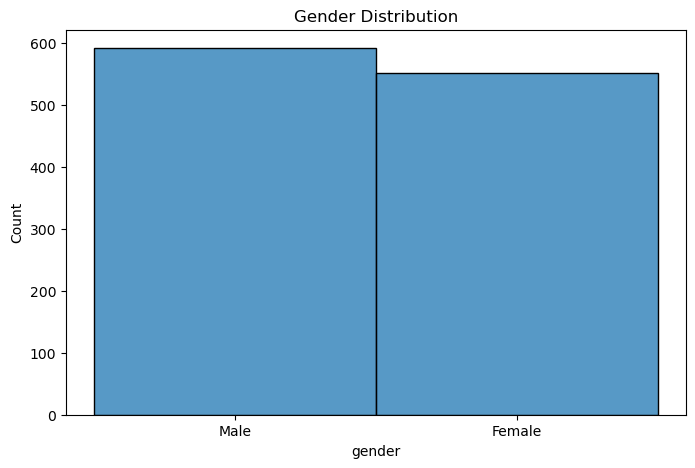

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['gender'])
plt.title('Gender Distribution', size=12)

Text(0.5, 1.0, 'Age Distribution')

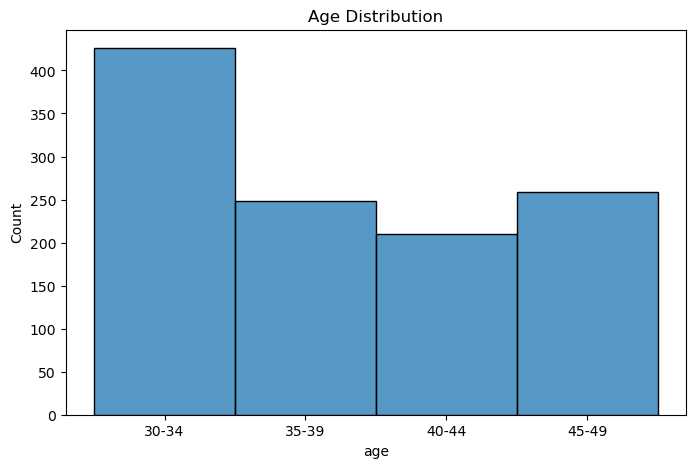

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Number of Ads per Campaign')

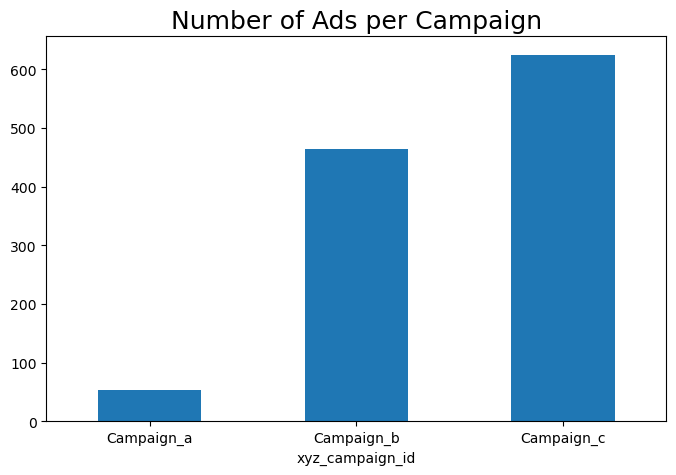

In [17]:
df.groupby('xyz_campaign_id')['ad_id'].count().plot(kind='bar', figsize=(8, 5), rot=0)
plt.title('Number of Ads per Campaign', size=18)

<br>


Based on the columns of the data, we can see the given journey of customer acquisition into four distinct stages: Awareness, Interest, Consideration, and Purchase. Each stage is represented by key metrics:

- **Awareness (Impressions)**: This initial stage signifies the exposure of potential customers to our brand or offerings.

- **Interest (Clicks)**: Clicks denote a heightened level of interest and engagement as prospects actively explore our products or services.

- **Consideration (Total_Conversion)**: The consideration stage reflects the process where prospects delve deeper, evaluating options and potentially expressing interest through inquiries or other forms of interaction.

- **Purchase (Approved_Conversion)**: Finally, the purchase stage represents the ultimate goal, where prospects transition into customers by completing a desired action or transaction.

Text(0.5, 1.0, 'Numerical Column Distribution and Correlation')

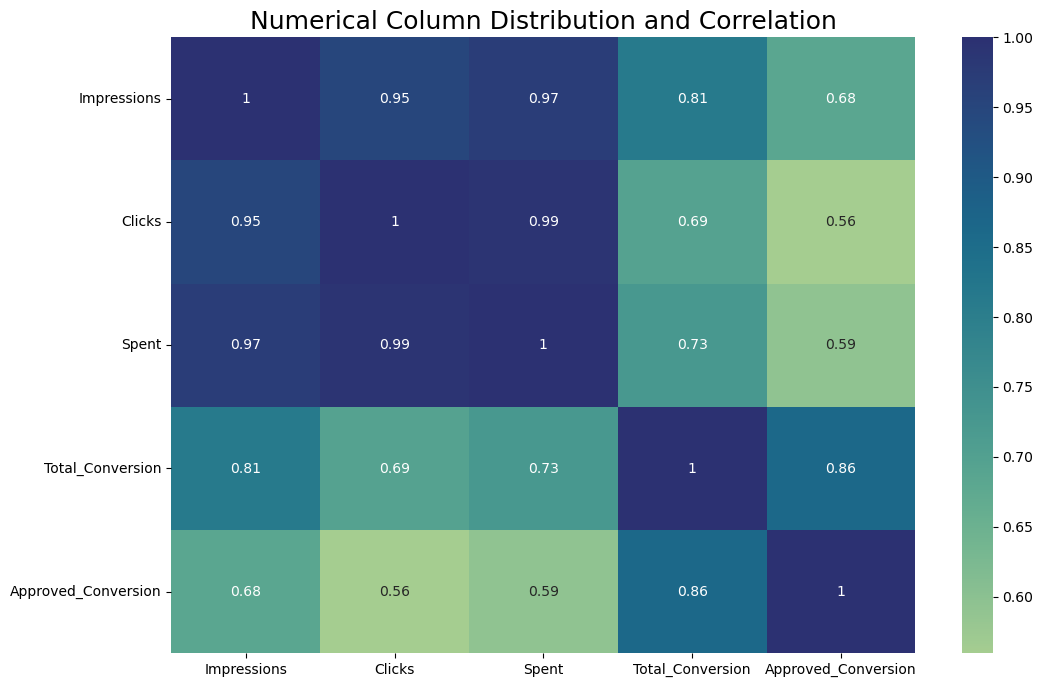

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df[
    ['Impressions', 
     'Clicks', 
     'Spent', 
     'Total_Conversion', 
     'Approved_Conversion']
]. corr(), annot=True, cmap='crest')
plt.title('Numerical Column Distribution and Correlation', size=18)

In [19]:
df.to_csv('fb_ads_final.csv', index=False)
print("CSV file 'fb_ads_final.csv' has been created successfully.")

CSV file 'fb_ads_final.csv' has been created successfully.
